Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dict_keys(['SSP1_19', 'SSP1_26', 'SSP1_45', 'SSP1_70', 'SSP1_85'])
['Year', 'CO2', 'CH4', 'N2O', 'Halogens', 'O3', 'H2O STRAT 2', 'Contrail-cirrus', 'Aerosol radiation interactions', 'Aerosol cloud interactions', 'BC on snow', 'Land use', 'Volcanic', 'Solar', 'Total anthropogenic', 'Total natural', 'Total']
Kolumny w pliku:
['year', 'co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric', 'contrails', 'aerosol-radiation_interactions', 'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic', 'solar', 'nonco2_wmghg', 'aerosol', 'chapter2_other_anthro', 'total_anthropogenic', 'total_natural', 'total']


/tmp/ipython-input-3560846988.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)
/tmp/ipython-input-3560846988.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype(int)
/tmp/ipython-input-3560846988.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

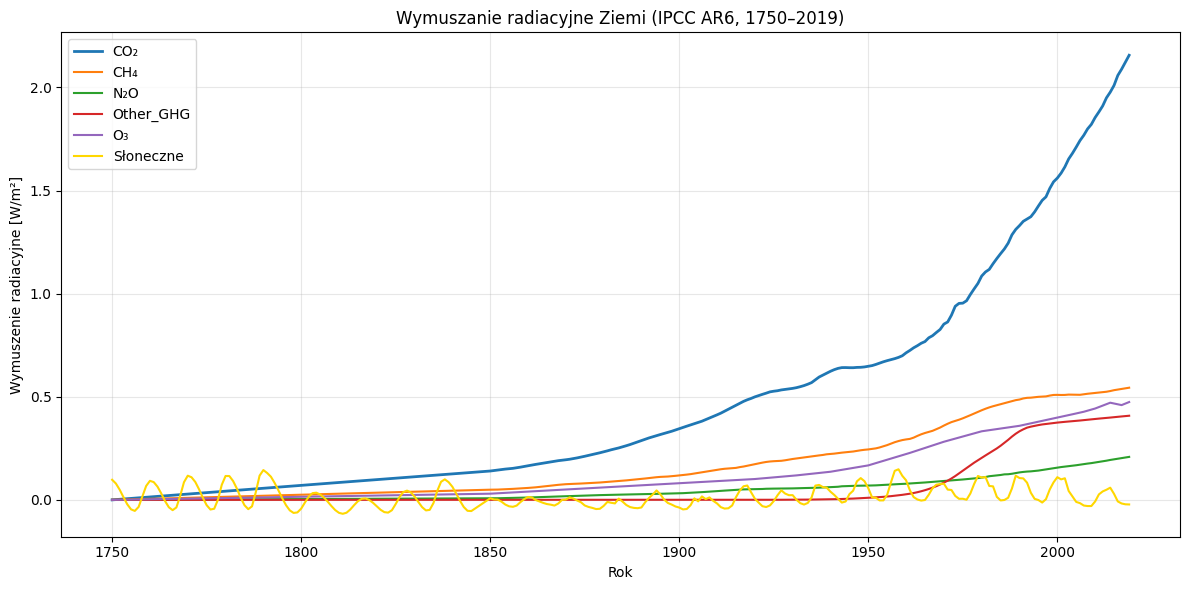

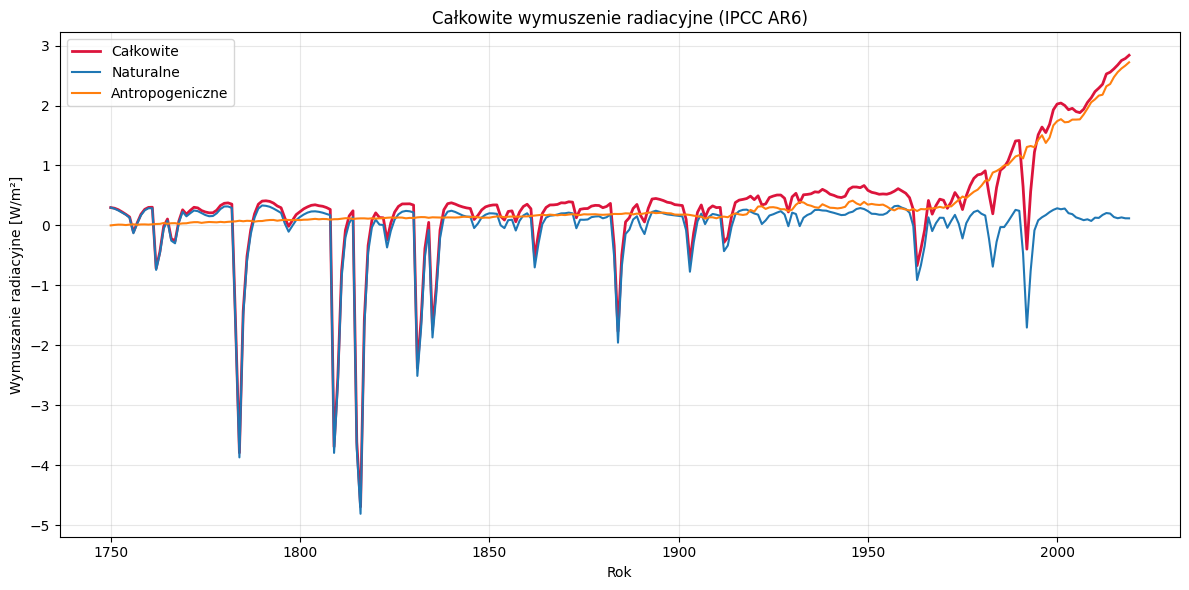

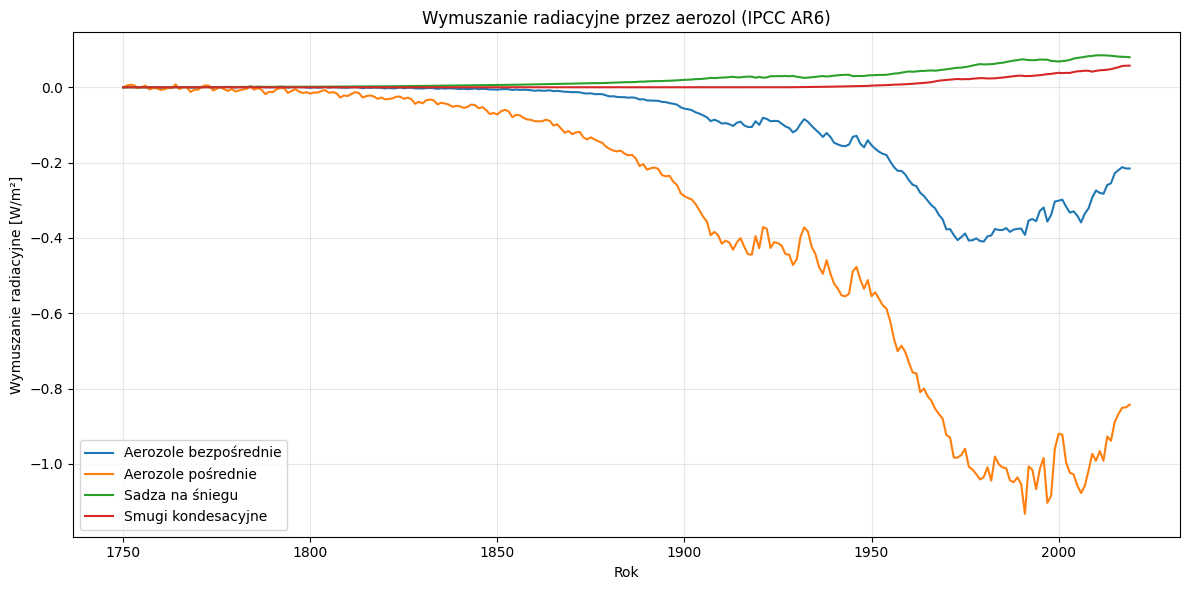

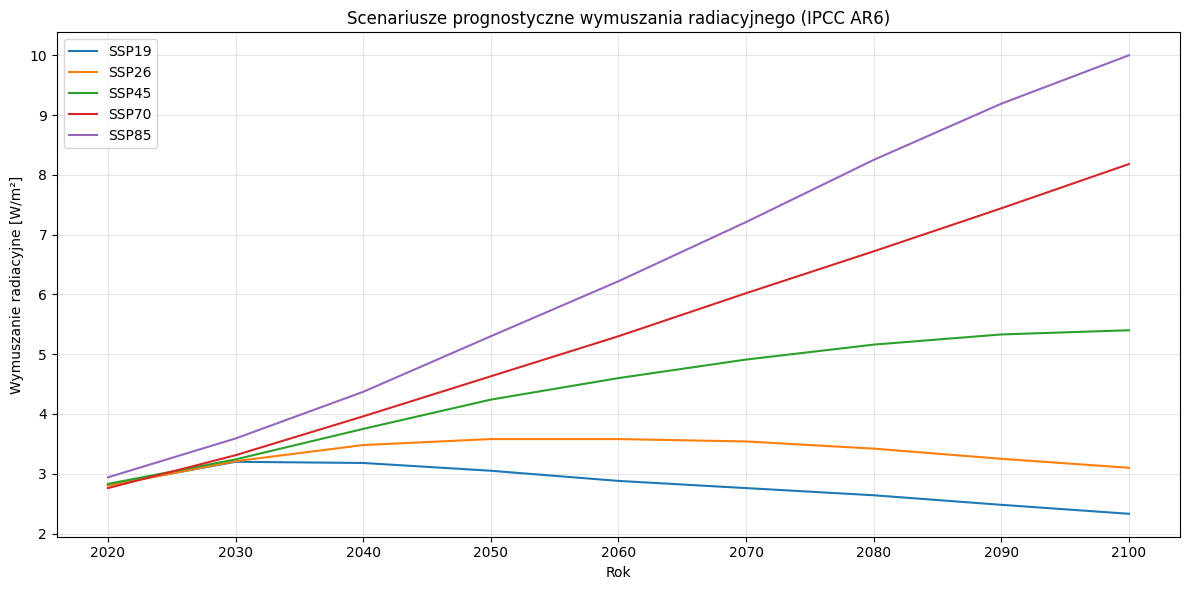

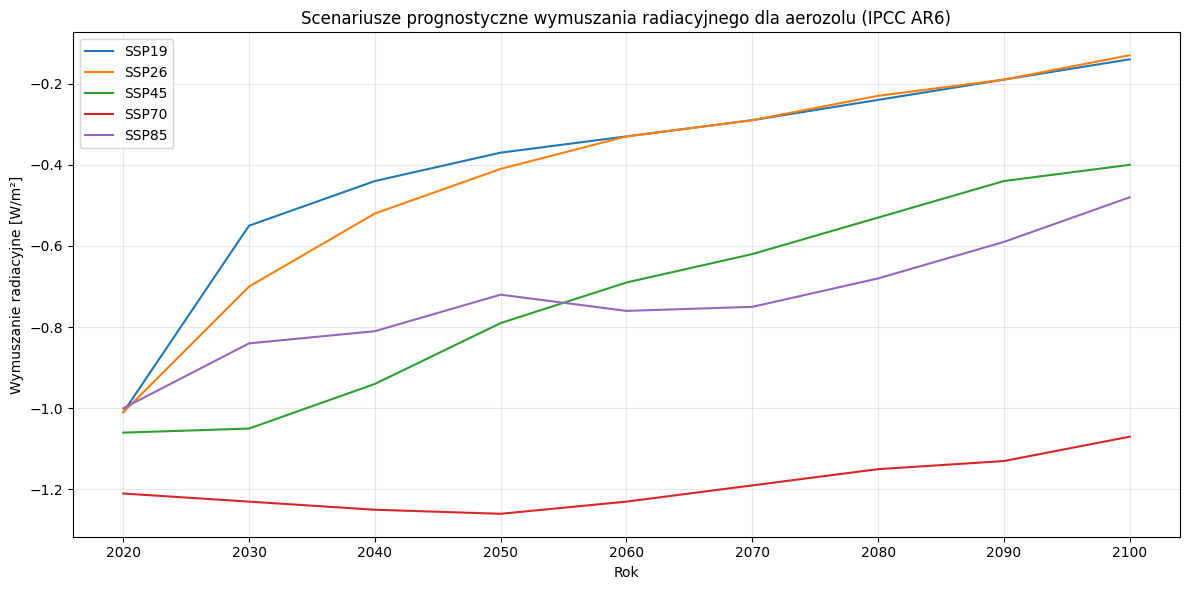

In [31]:
# --- 📦 Import bibliotek ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# --- 🔧 Montowanie Google Drive (jeśli plik masz tam) ---
from google.colab import drive
drive.mount('/content/drive')

# --- 📂 Wczytaj dane z pliku IPCC AR6 ---
# Jeśli przesyłasz plik ręcznie do Colaba, podaj nazwę:
#plik = "AR6_ERF_1750-2019.csv"

# Jeśli masz inny folder na Drive:
plik = "/content/drive/MyDrive/PracowniaGGG/AR6_ERF_1750-2019.csv"
plikIPCC = "/content/drive/MyDrive/PracowniaGGG/ScenariuszeIPCC.xlsx"
df = pd.read_csv(plik)
sheets = pd.read_excel(plikIPCC, sheet_name=None)  # None = wszystkie arkusze
print(sheets.keys())  # nazwy arkuszy
#Dostęp do konkretnej zakładki: 'SSP1_19', 'SSP1_26', 'SSP1_45', 'SSP_70', 'SSP1_85'
SSP19=sheets["SSP1_19"]
SSP26=sheets["SSP1_26"]
SSP45=sheets["SSP1_45"]
SSP70=sheets["SSP1_70"]
SSP85=sheets["SSP1_85"]

SSP19=SSP19[(SSP19['Year'] >= 2000) & (SSP19['Year'] <= 2100)]
SSP26=SSP26[(SSP19['Year'] >= 2000) & (SSP26['Year'] <= 2100)]
SSP45=SSP45[(SSP19['Year'] >= 2000) & (SSP45['Year'] <= 2100)]
SSP70=SSP70[(SSP19['Year'] >= 2000) & (SSP70['Year'] <= 2100)]
SSP85=SSP85[(SSP19['Year'] >= 2000) & (SSP85['Year'] <= 2100)]
print(SSP19.columns.tolist())


def interpolate_annual(df):
    # Upewniamy się, że Year jest typu int
    df['Year'] = df['Year'].astype(int)
    # Ustawiamy Year jako indeks
    df = df.set_index('Year')
    # Dodajemy brakujące lata
    df = df.reindex(range(df.index.min(), df.index.max() + 1))
    # Interpolacja liniowa
    df = df.interpolate(method='linear')
    # Przywracamy Year jako kolumnę
    df = df.reset_index()
    return df

SSP19=interpolate_annual(SSP19)
SSP26=interpolate_annual(SSP26)
SSP45=interpolate_annual(SSP45)
SSP70=interpolate_annual(SSP70)
SSP85=interpolate_annual(SSP85)

# --- 🔍 Sprawdź strukturę danych ---
print("Kolumny w pliku:")
print(df.columns.tolist())


# --- 📅 Wybierz lata i podstawowe składniki ---
kolumny = ['year', 'co2', 'ch4', 'n2o', 'other_wmghg', 'o3', 'h2o_stratospheric', 'contrails', 'aerosol-radiation_interactions', 'aerosol-cloud_interactions', 'bc_on_snow', 'land_use', 'volcanic', 'solar', 'nonco2_wmghg', 'aerosol', 'chapter2_other_anthro', 'total_anthropogenic', 'total_natural', 'total']

df = df[kolumny]

# --- 📊 Rysowanie wykresów ---

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['co2'], label='CO₂', lw=2)
plt.plot(df['year'], df['ch4'], label='CH₄')
plt.plot(df['year'], df['n2o'], label='N₂O')
plt.plot(df['year'], df['other_wmghg'], label='Other_GHG')
plt.plot(df['year'], df['o3'], label='O₃')
#plt.plot(df['year'], df['aerosol-radiation_interactions'], label='Aerozole (całkowite)', color='gray')

plt.plot(df['year'], df['solar'], label='Słoneczne', color='gold')

plt.title("Wymuszanie radiacyjne Ziemi (IPCC AR6, 1750–2019)")
plt.xlabel("Rok")
plt.ylabel("Wymuszenie radiacyjne [W/m²]")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# --- 📈 Drugi wykres: tylko całkowite wymuszenie antropogeniczne ---
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['total'], label='Całkowite',color='crimson', lw=2)
plt.plot(df['year'],df['total_natural'],label='Naturalne')
plt.plot(df['year'],df['total_anthropogenic'],label='Antropogeniczne')
plt.title("Całkowite wymuszenie radiacyjne (IPCC AR6)")
plt.xlabel("Rok")
plt.ylabel("Wymuszanie radiacyjne [W/m²]")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---- Trzeci wykres: Aerozole
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['aerosol-radiation_interactions'], label='Aerozole bezpośrednie')
plt.plot(df['year'], df['aerosol-cloud_interactions'], label='Aerozole pośrednie')
plt.plot(df['year'], df['bc_on_snow'], label='Sadza na śniegu')
plt.plot(df['year'], df['contrails'], label='Smugi kondesacyjne')

plt.title("Wymuszanie radiacyjne przez aerozol (IPCC AR6)")
plt.xlabel("Rok")
plt.ylabel("Wymuszanie radiacyjne [W/m²]")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# ---- Czwarty wykres: Przyszłość Total
plt.figure(figsize=(12, 6))
plt.plot(SSP19['Year'], SSP19['Total'], label='SSP19')
plt.plot(SSP26['Year'], SSP26['Total'], label='SSP26')
plt.plot(SSP45['Year'], SSP45['Total'], label='SSP45')
plt.plot(SSP70['Year'], SSP70['Total'], label='SSP70')
plt.plot(SSP85['Year'], SSP85['Total'], label='SSP85')

plt.title("Scenariusze prognostyczne wymuszania radiacyjnego (IPCC AR6)")
plt.xlabel("Rok")
plt.ylabel("Wymuszanie radiacyjne [W/m²]")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ---- Przyszłość Aerozol
plt.figure(figsize=(12, 6))
plt.plot(SSP19['Year'], SSP19['Aerosol radiation interactions']+SSP19['Aerosol cloud interactions'], label='SSP19')
plt.plot(SSP26['Year'], SSP26['Aerosol radiation interactions']+SSP26['Aerosol cloud interactions'], label='SSP26')
plt.plot(SSP45['Year'], SSP45['Aerosol radiation interactions']+SSP45['Aerosol cloud interactions'], label='SSP45')
plt.plot(SSP70['Year'], SSP70['Aerosol radiation interactions']+SSP70['Aerosol cloud interactions'], label='SSP70')
plt.plot(SSP85['Year'], SSP85['Aerosol radiation interactions']+SSP85['Aerosol cloud interactions'], label='SSP85')

plt.title("Scenariusze prognostyczne wymuszania radiacyjnego dla aerozolu (IPCC AR6)")
plt.xlabel("Rok")
plt.ylabel("Wymuszanie radiacyjne [W/m²]")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
